In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# !ls "/content/gdrive/My Drive/ml-100k"

### 모듈 불러오기

In [1]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

### 파일 불러오기

In [3]:
train = pd.read_csv("/content/gdrive/My Drive/ml-100k/ua.base",
 sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/My Drive/ml-100k/ua.test",
 sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [ ]:
# pytorchtensor데이터로변환
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [ ]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

## 기본MatrixFactorization구현

In [7]:
optimizer = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  hypothesis = torch. sum(P[items] * Q[users], dim= 1)
  cost = F.mse_loss(hypothesis ,ratings)
  
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  X.append(epoch)
  Y.append(cost)
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

epoch: 0, cost: 24.274586
epoch: 100, cost: 0.567519
epoch: 200, cost: 0.493986
epoch: 300, cost: 0.471319
epoch: 400, cost: 0.461005
epoch: 500, cost: 0.455251
epoch: 600, cost: 0.451740
epoch: 700, cost: 0.449356
epoch: 800, cost: 0.447628
epoch: 900, cost: 0.446301


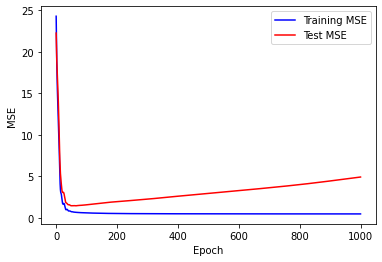

In [8]:
# Matplotlib으로epoch마다TrainingMSE그려보기
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

## Regularization추가하기

In [13]:
lambda1 = 0.0001
lambda2 = 0.0001

#그래프 그려보기 위해 저장
X = []
Y = []
Y_test = []

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(cost)
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

epoch: 0, cost: 12.655086
epoch: 100, cost: 0.629982
epoch: 200, cost: 0.627711
epoch: 300, cost: 0.627305
epoch: 400, cost: 0.626975
epoch: 500, cost: 0.626581
epoch: 600, cost: 0.626309
epoch: 700, cost: 0.626178
epoch: 800, cost: 0.626082
epoch: 900, cost: 0.626008


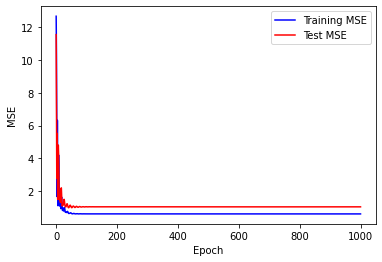

In [14]:
# Matplotlib으로epoch마다TrainingMSE그려보기
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

## Bias 추가하기

In [11]:
# Regularization추가하기
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.001
lambda4 = 0.001

# bias 추가
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

#그래프 그려보기 위해 저장
X = []
Y = []
Y_test = []

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(cost)
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

epoch: 0, cost: 14.101965
epoch: 100, cost: 0.620125
epoch: 200, cost: 0.607773
epoch: 300, cost: 0.604133
epoch: 400, cost: 0.603333
epoch: 500, cost: 0.603060
epoch: 600, cost: 0.602892
epoch: 700, cost: 0.602748
epoch: 800, cost: 0.602603
epoch: 900, cost: 0.602462


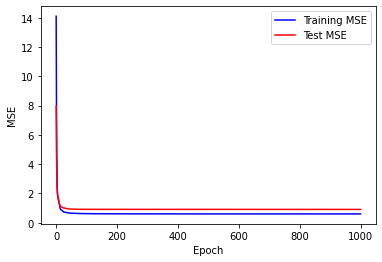

In [12]:
# Matplotlib으로epoch마다TrainingMSE그려보기
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()